In [ ]:
# Data preprocessing technique meant to deal with data in which you are going to perform analysis or intelligence extraction(Inferential Stats)
# The goal of data preprocessing is to make the data compatible for the AI modelling
#
# Basic Expectation from Inferential Stats:
#  1. Data must be complete
#  2. Data must be STRICTLY NUMERIC
#
# Preprocessing Task:
# 1. Check and handle MISSING DATA
# 2. Check and handle CATEGORICAL DATA
# 3. Check and handle ORDINAL DATA
# 4. Perform Data Standardization/Normalization

In [ ]:
# Check and Handle Missing data
#
# The process of dealing with missing values such that the NATURE OF THE DATA is preserved is called IMPUTATION
#
# Guidelines to Handle Missing Data
# =====================================
#
# Missing data can be handled in 3 ways:
# a. Statistical Way
# b. Domain Way
# c. Hybrid Way
#
# ==========================================
# Statistical Way
# ==========================================
# a. For Numerical Columns
#             a. Continuous ND: Replace Missing value(NaN) with the MEAN value of the column
#             b. Discrete ND  : Replace Missing value(NaN) with the MEDIAN value of the column
# b. For non-numerical columns
#             Replace Missing values(NaN) with the Mode's first value of the column
#
#
# ==========================================
# Domain Way
# ==========================================
# Replace Missing value(NaN)  with the default value of the column
# Default value can be derived from the domain expert
#
# e.g. Real Estate in Mumbai, India ----- Tower ------ MMRDA ---- Guidelines and Policies for Car Parking
#
# Builder is offering
# 2 BHK -----> 1 car parking
# 3 BHK -----> 2 car parking
# 4+ BHK ----> 3 car parking
#
# Parking ----> NaN
#
# =========================================
# Hybrid Way
# =========================================
#
# Some columns will follow Stat approach while others will follow domain approach

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('preprocessExample.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    9 non-null      object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [ ]:
data.isna().sum()

,0
Country,1
Age,1
Salary,1
Purchased,0


In [ ]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,NaN,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
# ==========================================
# Statistical Way
# ==========================================
# a. For Numerical Columns
#             a. Continuous ND: Replace Missing value(NaN) with the MEAN value of the column
#             b. Discrete ND  : Replace Missing value(NaN) with the MEDIAN value of the column
# b. For non-numerical columns
#             Replace Missing values(NaN) with the Mode's first value of the column
#
#
# Assume
# Salary ----> Continuous ND --------> Replace NaN with the MEAN value
# Age -------> Discrete ND ----------> Replace NaN with the MEDIAN value
# Country ---> Categorical ----------> Replace NaN with the Mode's first value

In [ ]:
#Age

data['Age'].median()

38.0

In [ ]:
#fillna is responsible to replace NaN with the provided value
data['Age'].fillna(data['Age'].median() , inplace=True)

<ipython-input-12-8be27ede57d5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median() , inplace=True)


In [ ]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,38.0,52000.0,No
7,France,48.0,79000.0,Yes
8,NaN,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
#Salary

round(data['Salary'].mean() , 2)

63777.78

In [ ]:
data['Salary'].fillna( round(data['Salary'].mean() , 2) , inplace=True)

<ipython-input-17-1aead3022846>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Salary'].fillna( round(data['Salary'].mean() , 2) , inplace=True)


In [ ]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.00,No
1,Spain,27.0,48000.00,Yes
2,Germany,30.0,54000.00,No
3,Spain,38.0,61000.00,No
4,Germany,40.0,63777.78,Yes
5,France,35.0,58000.00,Yes
6,Spain,38.0,52000.00,No
7,France,48.0,79000.00,Yes
8,NaN,50.0,83000.00,No
9,France,37.0,67000.00,Yes


In [ ]:
#Country

data['Country'].mode()[0]

'France'

In [ ]:
data['Country'].fillna( data['Country'].mode()[0] , inplace=True)

<ipython-input-21-d5c142609b15>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Country'].fillna( data['Country'].mode()[0] , inplace=True)


In [ ]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.00,No
1,Spain,27.0,48000.00,Yes
2,Germany,30.0,54000.00,No
3,Spain,38.0,61000.00,No
4,Germany,40.0,63777.78,Yes
5,France,35.0,58000.00,Yes
6,Spain,38.0,52000.00,No
7,France,48.0,79000.00,Yes
8,France,50.0,83000.00,No
9,France,37.0,67000.00,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        10 non-null     float64
 2   Salary     10 non-null     float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [ ]:
data.describe()

,Age,Salary
count,10.000000,10.000000
mean,38.700000,63777.778000
std,7.257946,11564.099406
min,27.000000,48000.000000
25%,35.500000,55000.000000
50%,38.000000,62388.890000
75%,43.000000,70750.000000
max,50.000000,83000.000000


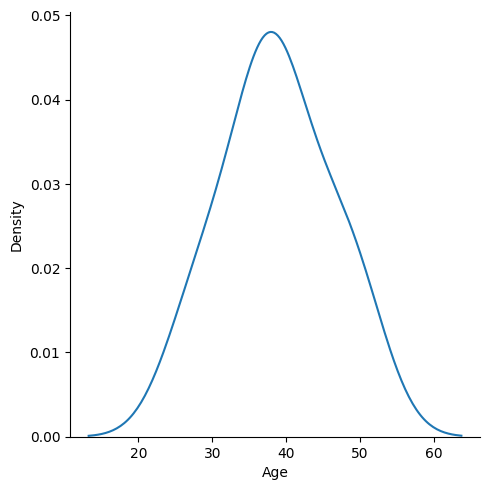

In [ ]:
import seaborn as sns
sns.displot(data = data['Age'] , kind='kde')

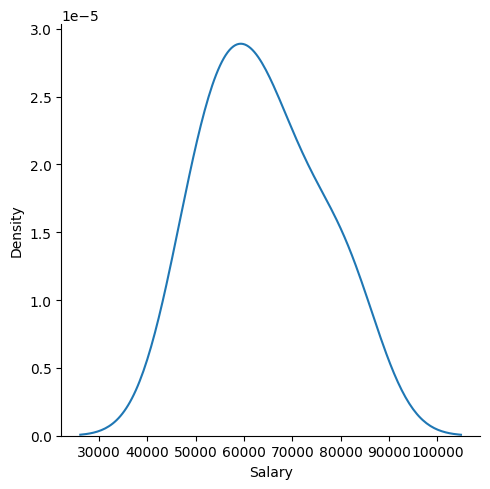

In [ ]:
sns.displot(data = data['Salary'] , kind='kde')

In [ ]:
data1['YearBuilt'].fillna(2000, inplace=True)